# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combine = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study_combine


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_unique_count = mouse_study_combine['Mouse ID'].nunique()
mouse_unique_count



249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_duplicates = mouse_study_combine[mouse_study_combine.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
print(mouse_study_duplicates)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_combine.drop_duplicates("Timepoint")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
duplicate_mouse_df = mouse_study_combine[mouse_study_combine['Mouse ID']=="g989"]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_combine[mouse_study_combine['Mouse ID']!="g989"]
clean_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
# clean_mouse_df['Mouse ID'].unique()

clean_mouse_count = clean_mouse_df['Mouse ID'].nunique()
clean_mouse_count



248

## Summary Statistics

In [8]:
#Create Group by drug regimen
group_drug_regimen = clean_mouse_df.groupby(["Drug Regimen"])
group_drug_regimen.head(10)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
692,c580,Ketapril,Male,22,25,10,47.570174,1
693,c580,Ketapril,Male,22,25,15,51.991708,1
694,c580,Ketapril,Male,22,25,20,55.575322,2
695,c580,Ketapril,Male,22,25,25,56.289062,2


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_mean = group_drug_regimen['Tumor Volume (mm3)'].mean()
drug_median = group_drug_regimen['Tumor Volume (mm3)'].median()
drug_std = group_drug_regimen['Tumor Volume (mm3)'].std()
drug_SEM = group_drug_regimen['Tumor Volume (mm3)'].sem()

drug_summary = pd.DataFrame({"Drug Mean": drug_mean,
                            "Drug Median": drug_median,
                            "Drug std": drug_std,
                            "Drug SEM": drug_SEM })
drug_summary

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# print(drug_median)
# print(drug_mean)
# print(drug_std)

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# from statistics import stdev
# print("The Standard Deviation of Sample1 is % s"
#                               %(stdev('Tumor Volume (mm3)')))


# print("Standard Deviation of sample is % s "
#                 % (statistics.stdev('Tumor Volume (mm3)')))

                
# Assemble the resulting series into a single summary DataFrame.



,Drug Mean,Drug Median,Drug std,Drug SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [10]:
# new_table_df = pd.DataFrame.groupby(group_drug_regimen)({'Mean':[drug_mean], 'Median':[drug_median], "STD":[drug_std]})
# new_table_df

In [11]:
# New table with each with each column (Mean Median )
new_table = pd.DataFrame({'Drug Name':[group_drug_regimen], 
                        'Mean':['-'],
                        'Median':['-'],
                        "STD":['-']})
new_table()

TypeError: 'DataFrame' object is not callable

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoint_drug = group_drug_regimen['Timepoint'].count()
timepoint_drug



Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

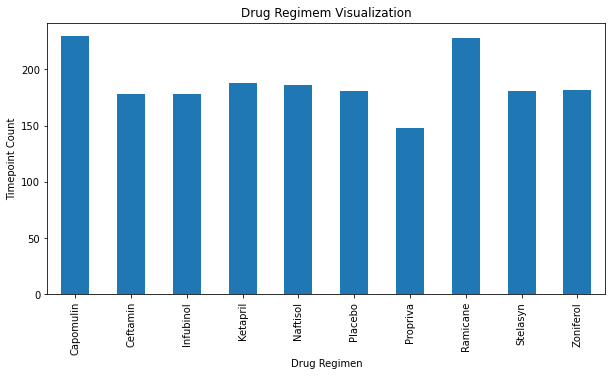

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoint_drug.plot(kind = "bar", figsize = (10,5))

#chart titles
plt.title("Drug Regimem Visualization")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint Count")



#show chart
plt.show()


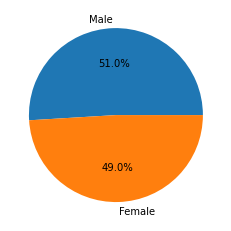

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_count = clean_mouse_df.Sex.value_counts()
plt.pie(sex_count.values,labels=["Male", "Female"],autopct='%1.1f%%')
plt.show()

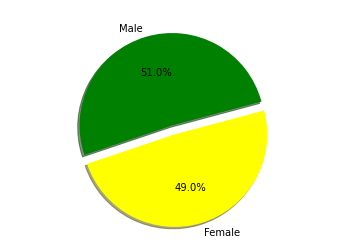

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

py_sex_count = [51.0,49.0,]
 
myLabels = 'Male','Female'
myColors = ['green','yellow']
myExplode = (0.1, 0)

plt.pie(py_sex_count, labels=myLabels, autopct='%1.1f%%', startangle=15, shadow = True, colors=myColors, explode=myExplode)

plt.title('Male vs Female Data').set_color('white')

plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

top_regimes = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
top_regimes = top_regimes.sort_values(["Timepoint"], ascending=True)
top_regimes
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
top_regimes_data = top_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

top_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. Start for loop

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset (data putting this into the empty list)
    
    
    # Determine outliers using upper and lower bounds     

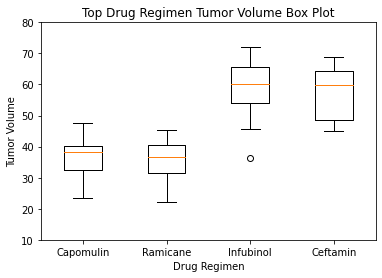

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Group data by Drug Regimen and Mouse ID  -  Last Tumor Measurement
top_regimens_sort = top_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_regimens_sort.head()

# Turn retrieved data into dataframe
top_regimen_df = top_regimens_sort.to_frame()
top_regimen_df

#Create a list 
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
final_df = top_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)

#chart titles
plt.title("Top Drug Regimen Tumor Volume Box Plot")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.show()

## Line and Scatter Plots

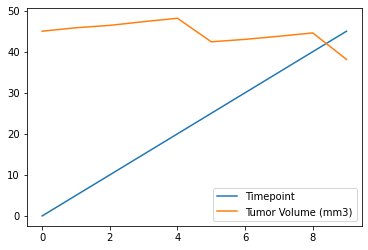

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

time_vs_tumer = clean_mouse_df[clean_mouse_df["Mouse ID"].isin(["j119"])]
time_vs_tumer

time_vs_tumer_data = time_vs_tumer[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumer_data

line_plot_df = time_vs_tumer_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_final

lines = line_plot_final.plot.line()

In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



Text(0.5, 1.0, 'Capomulin Regimen Tumor Volume vs Mouse Weight')

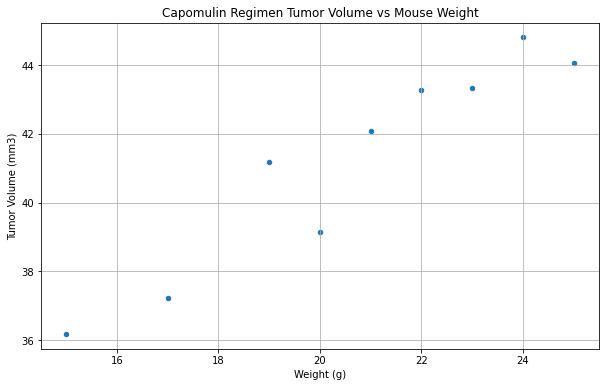

In [66]:
capomulin_scatter = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = top_regimes[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)



capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()


#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')
#
capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (10,6))
plt.title("Capomulin Regimen Tumor Volume vs Mouse Weight")


## Correlation and Regression

In [63]:
from scipy import stats

In [65]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_scatter["Weight (g)"]
y_values = capomulin_scatter["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

fig, ax = plt.subplots(figsize=(6,10))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 10, color = "red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight vs Avgerage Tumor Volume")

plt.show()

TypeError: 'AxesSubplot' object is not subscriptable